# Homework 2
#### EE-556 Mathematics of Data - Fall 2024

This homework covers Lectures 8-12. Please take a look at the material for the context and notation.

In this homework we will study minimax problems. We will begin with some theoretical analysis and in a second part you will implement a Wasserstein Generative Adversarial Network (WGAN). 

These notebooks should expose you to the fundamentals of GAN training at a basic level, as well as some of the theory behind it.

## 1. Minimax problems - 65 points

### 1.1 Theoretical recap: stationary points and convergence in minmax games - 25 points

Consider a stylized function $f: \mathbb{R}^2 \to \mathbb{R}$, such that we have $f(x, y)=(ax-b)(ay-c)$ for some $a \neq 0,b,c$.

__(1)__ (5 points) Write down the first-order stationary points of $f$, and
        classify them as local minimum, local maximum, or saddle point by
        inspecting its Hessian.




__Answer to (1)__

First-order stationary points $\mathbf{x}$ satisfy $\nabla f(\mathbf{x}) = \mathbf{0}$, so the find the first-order stationary points of $f(x, y)$, we need to solve:
$$
\nabla f(x, y) = 
\left(
\begin{aligned}
    \frac{\partial f}{\partial x} \\
    \frac{\partial f}{\partial y}
\end{aligned}
\right) =
\left(
\begin{aligned}
    a(ay - c) \\
    a(ax - b)
\end{aligned}
\right) = \mathbf{0}
\implies x = \frac{b}{a}, y = \frac{c}{a} \: (\text{because} \: a \neq 0)
$$

So the first-order stationary point of $f(x, y)$ is $(x, y) = (\frac{b}{a}, \frac{c}{a})$. To classify it as local minimum, local maximum, or saddle point, we have to inspecting its Hessian:

$$
H = 
\begin{bmatrix}
    \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
    \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}
=
\begin{bmatrix}
    0 & a^2 \\
    a^2 & 0
\end{bmatrix}
$$

Since the determinant $det(H) = -a^4 < 0 \: \forall a \neq 0$ we conclude that the first-order stationary point $(\frac{b}{a}, \frac{c}{a})$ is a **saddle point**. To further solidify this result, we can calculate the Eigenvalues of $H$ by solving $|H-\lambda I| = 0$, which has $\lambda^2 - a^4 = 0$ as charactersitic polynomial and therefor its Eigenvalues are $\lambda _1 = a^2$ and $\lambda _2 = -a^2$. Since the Eigenvalues have different signs we conclude that the first-order stationary point $(\frac{b}{a}, \frac{c}{a})$ is a saddle point.


__(2)__ (5 points) Find the solution $(x^\star,y^\star)$ to the
        minimax problem $\min_x \max_y f(x, y)$. You can quantify the solution
        by using the following saddle point inequality:  $f(x^\star, y^\star)
        \geq f(x^\star, y)$ and $f(x^\star, y^\star) \leq f(x, y^\star)$, for
        all $x, y$.
        
**HINT:** $(x^\star, y^\star)$ can only be one of the critical points you found in (1), just evaluate $f$ at every place in the inequalities to check the optimality!




__Answer to (2)__

As shown in (1), the critical point is $(x^\star, y^\star) = (\frac{b}{a}, \frac{c}{a})$.

First we check that $f(x^\star, y^\star) \geq f(x^\star, y)$.  
By substituting the values for $x^\star$ and  $y^\star$ into the function $f(x, y)=(ax-b)(ay-c)$ we get that:
$$
f(x^\star, y^\star) = (a \cdot (\frac{b}{a}) - b)(a \cdot (\frac{c}{a}) - c) = 0 \quad \text{and} \quad f(x^\star, y) = (a \cdot (\frac{b}{a}) - b) \cdot (ay-c)  = 0 \cdot (ay-c) = 0 \: \forall y \in \R
$$
Since $0 \geq 0$ holds, we can conlcude that for $(x^\star, y^\star) = (\frac{b}{a}, \frac{c}{a})$ the first condition $f(x^\star, y^\star) \geq f(x^\star, y)$ of the minmax problem is satisfied.

Second we check that $f(x^\star, y^\star) \leq f(x, y^\star)$.  
By substituting the values for $x^\star$ and  $y^\star$ into the function $f(x, y)=(ax-b)(ay-c)$ we get that:
$$
f(x^\star, y^\star) = (a \cdot (\frac{b}{a}) - b)(a \cdot (\frac{c}{a}) - c) = 0 \quad \text{and} \quad f(x, y^\star) = (ax-b) \cdot (a \cdot (\frac{c}{a}) - c) = (ax-b) \cdot 0 = 0 \: \forall x \in \R
$$
Since $0 \leq 0$ holds, we can conlcude that for $(x^\star, y^\star) = (\frac{b}{a}, \frac{c}{a})$ the second condition $f(x^\star, y^\star) \leq f(x, y^\star)$ of the minmax problem is also satisfied.

Therefor we conclude that the first-order stationary point $(x, y) = (\frac{b}{a}, \frac{c}{a})$ found in (1) is a soltuion to the minimax problem $\min_x \max_y f(x, y)$.

__(3)__ (15 points) One possible attempt at finding this solution via iterative
        first-order methods is to perform gradient updates on the variables $x$
        and $y$. More precisely for $\gamma > 0$ consider the simultaneous gradient
        descent/ascent updates
        
\begin{equation}
    x_{k+1} = x_k - \gamma \nabla_x f(x_k, y_k), \qquad
    y_{k+1} = y_k + \gamma \nabla_y f(x_k, y_k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x_k, y_k \}_{k=0}^\infty$ starting
from any point $(x_0, y_0) \neq (x^\star, y^\star)$ diverges, for any $\gamma > 0$.
Find the rate at which the distance from 
$(x^\star,y^\star)$ to the sequence $\{x_k, y_k \}$ grows as the number of iterations $k$ increases.

**HINT:** Define $d_k^2=||(x_k,y_k)-(x^\star, y^\star)||_2^2$ as the sequence of squared distances to the optimum. If you find a formula for how $d_{k+1}$ depends on $d_k$ using the exact gradient updates for our $f$, you can easily argue for the divergence and the rate.

__Answer (3)__

As suggested, we define $d_k^2=||(x_k,y_k)-(x^\star, y^\star)||_2^2$ with $(x^\star, y^\star) = (\frac{b}{a}, \frac{c}{a})$ and $\nabla_x f(x_k, y_k) = a(ay_k - c)$ and $\nabla_y f(x_k, y_k) = a(ax_k - b)$ as shown in answer (1). Therefor the gradient descent/ascent updates become:
$$
x_{k+1} = x_k - \gamma a(ay_k - c), \qquad y_{k+1} = y_k + \gamma a(ax_k - b) \nonumber \tag{1}
$$

To simplify the notation, we introduce:  
$$
d_{x,k} = x_k - x^\star, \qquad d_{y,k} = y_k - y^\star, \qquad \text{where} \: d_k^2 = d_{x,k}^2 + d_{y,k}^2 = ||(x_k,y_k)-(x^\star, y^\star)||_2^2 \tag{2}
$$

Using this notation with the gradient descent/ascent update rules stated in (1) and $(x^\star, y^\star) = (\frac{b}{a}, \frac{c}{a})$ we have that:  
$$
d_{x,k+1} = x_{k+1} - x^\star = x_k - \gamma a \big( a y_{k} - c \big) - \frac{b}{a} \tag{3a}
$$  
$$
d_{y,k+1} = y_{k+1} - y^\star = y_k + \gamma a \big( a x_{k} - b \big) - \frac{c}{a} \tag{3a}
$$

Since our goal is to find a relation between $d_k^2$ and $d_{k+1}^2$, we substitute $x_k = d_{x, k} + \frac{b}{a}$ and $y_k = d_{y, k} + \frac{c}{a}$, both relations are derived from (2), into (3a) and (3b) respectively:

$$
d_{x,k+1} = d_{x,k} + \frac{b}{a} - \gamma a \big( a (d_{y,k}+\frac{c}{a}) - c \big) - \frac{b}{a} = d_{x,k} - \gamma a^2 d_{y,k} \tag{4a}
$$  
$$
d_{y,k+1} = d_{y,k} + \frac{c}{a} + \gamma a \big( a (d_{x,k}+\frac{b}{a}) - b \big) - \frac{c}{a} = d_{y,k} + \gamma a^2 d_{x,k} \tag{4b}
$$

To get an expression for $d_{k+1}^2$ we need to combine the results obtained in (4a) and (4b):
$$
d_{k+1}^2 = d_{x,k+1}^2 + d_{y,k+1}^2
$$

Which leads to:

$$
d_{k+1}^2 = d_{x,k}^2 + d_{y,k}^2 - 2\gamma a^2 d_{x,k} d_{y,k} + \gamma^2 a^4 d_{y,k}^2 + 2\gamma a^2 d_{x,k} d_{y,k} + \gamma^2 a^4 d_{x,k}^2 \tag{5}
$$  

Simplifying (5) gives us:  
$$
d_{k+1}^2 = d_{x,k}^2 + d_{y,k}^2 + (\gamma a^2)^2 \big( d_{x,k}^2 + d_{y,k}^2 \big) = d_{k+1}^2 = \big( 1 + (\gamma a^2)^2 \big) \cdot d_k^2 \tag{6}
$$  

Using the recurrence relation $d_{k+1}^2 = \big( 1 + (\gamma a^2)^2 \big) \cdot d_k^2$ we found, we have that:  
$$
d_k^2 = \big( 1 + (\gamma a^2)^2 \big)^{k} \cdot d_0^2 \tag{7}
$$  

where $d_0^2$ is defined as $d_0^2=||(x_0,y_0)-(x^\star, y^\star)||_2^2$.

Since $(1 + (\gamma a^2)^2) > 1$ for $\gamma > 0$ and $a \neq 0$, the expression for $d_k^2$ diverges. Therefore, unless the initial distance is zero (which is only the case if $(x_0, y_0) = (x^\star, y^\star)$), the distance  diverges for any $\gamma > 0$ with a rate of $\big( 1 + (\gamma a^2)^2 \big)^{k}$. So we have shown that the sequence of iterates $\{x_k, y_k \}_{k=0}^\infty$ starting from any point $(x_0, y_0) \neq (x^\star, y^\star)$ diverges.



__(Optional $\star$)__ A second attempt at finding the solution via _alternating_ gradient descent ascent on $x$
        and $y$. More precisely for $\gamma > 0$ consider the update
        
\begin{equation}
    x_{k+1} = x_k - \gamma \nabla_x f(x_k, y_k), \qquad
    y_{k+1} = y_k + \gamma \nabla_y f(x_{k+1}, y_k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x_k, y_k \}_{k=0}^\infty$ starting
from any point $(x_0, y_0) \neq (x^\star, y^\star)$ i) never converges, ii) but still remains bounded under certain stepsize conditions.

**HINT**: Reduce the problem to studying a linear system.




### 1.2 A concrete example: Rock - Paper - Scissors - Lizard - Spock - 40 points

To make your previous abstract analysis more concrete, we will now look at the iconic Rock-Paper-Scissors-Lizard-Spock game. Sheldon and Leonard always like to settle their differences through a round of this game, whose rules they state as follows:

*"Scissors cuts Paper, Paper covers Rock, Rock crushes Lizard, Lizard poisons Spock, Spock smashes Scissors, Scissors decapitates Lizard, Lizard eats Paper, Paper disproves Spock, Spock vaporizes Rock, (and as it always has) Rock crushes Scissors"*

Sheldon and Leonard always pick to play Spock because "logic trumps all", it will be your task to show that this is not the optimal strategy.

We can formalize the game as follows. There are two players, the `x` player (e.g. Sheldon) and the `y` player (e.g. Leonard). There is only one single round. The players play a randomized strategy: each player chooses a probability of playing rock/paper/scissors/lizard/Spock. We look at the expected pay-off of these randomized strategies. 

In other words, the players choose an element in $\Delta_5$ the probability simplex in dimension 5. The `x` player chooses a vector $\mathbf{x} = \begin{bmatrix} \mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4 & \mathbf{x}_5 \end{bmatrix} \in \Delta_5$ where $\mathbf{x}_1$ is the probability of playing `Rock`, $\mathbf{x}_2$ is the probability of playing `Paper`, $\mathbf{x}_3$ is the probability of playing `Scissors`, $\mathbf{x}_4$ is the probability of playing `Lizard`, $\mathbf{x}_5$ is the probability of playing `Spock`. The `y` player chooses a vector $\mathbf{y} \in \Delta_5$ defined in the same way. 

The game designers decide that winning the game gives 1 point and a tie gives 0 points. So the expected payoff for a give choice of strategies $\mathbf{x}, \mathbf{y}$ is obtained by computing:
$$
\mathbf{x}^\top \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}\mathbf{y}
$$

The `x` player wants to minimize this expected payoff and the `y` player wants to maximize it. So the problem we seek to solve is

$$
\min_{\mathbf{x} \in \Delta_5} \max_{\mathbf{y} \in \Delta_5} \mathbf{x}^\top \mathbf{M}\mathbf{y} =: f(\mathbf{x}, \mathbf{y})
$$
with $\mathbf{M} = \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}$.

In the following cells, you will implement methods to solve this game and find the optimal strategies.

In [2]:
import torch
from ipywidgets import interact, SelectionSlider, fixed
from itertools import combinations
from scipy.stats import entropy
from lib.utils import *

**(1)** (2 points) Implement the objective function $f$ given two 3 dimensional vectors `x` and `y` stored as `torch.Tensor` objects.

In [3]:
M = torch.tensor([
    [0.0,1.0,-1.0,-1.0,1.0],
    [-1.0,0.0,1.0,1.0,-1.0],
    [1.0,-1.0,0.0,-1.0,1.0],
    [1.0,-1.0,1.0,0.0,-1.0],
    [-1.0,1.0,-1.0,1.0,0.0]
])
def f(x: torch.Tensor, y: torch.Tensor):
    return x.T @ M @ y

**(2)** (10 points) Implement a single step of the simultaneous gradient descent/ascent studied in question 1.1.(3). Since we are in a constrained setting, make sure you include a projection step onto the simplex. 

The function `GDA` you will implement takes in the objective function `f`, the two current strategies of the players stored in tensors `x` and `y` and a step_size. Write the function so that it modifies the variables `x` and `y` in place without returning anything.

We provide you with a function called `simplex_project` that projects a vector on the probability simplex. The function has no return value and does the projection in place. Use `Pytorch` to compute gradients automatically. 

__Hints__: Review what a call to `.backward()` on a tensor does. Review what in-place operations are like `.add_`. Think of which steps need to be in a `with torch.no_grad()` block. Remember to zero the gradients before re-using them.

In [4]:
def GDA(f, x, y, step_size):
    x.grad = None
    y.grad = None
    
    payoff = f(x, y)
    payoff.backward()

    with torch.no_grad():
        x.sub_(step_size * x.grad)
        y.add_(step_size * y.grad)
        
        simplex_project(x)
        simplex_project(y)

We can run this algorithm initialized from Sheldon and Leonard's strategies of always playing Spock.

In [5]:
x_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])
y_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])

gda_x_sequence, gda_y_sequence = run_alg(GDA, f, x_init, y_init, step_size=0.05, n_iterations=2500)

/var/folders/18/m5t215b91099mhnt7b5bl5sr0000gn/T/ipykernel_18706/4201192427.py:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3687.)
  return x.T @ M @ y


We can visualize this sequence as ${4 \choose 2} = 6$ two dimensional slices since the simplex $\Delta_5$ is 4-dimensional.

In [6]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(gda_x_sequence[:, dim_pairs[dim_pair]], 
                  gda_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

To have plots that aggregate the convergence status over all 5 dimensions at the same time, let's also visualize:

- the duality gap over time: $g_k = \max_{\mathbf{y} \in \Delta_5}{f(\mathbf{x}_k,\mathbf{y})} - \min_{\mathbf{x} \in \Delta_5}{f(\mathbf{x},\mathbf{y}_k)} = \max_{i}{(\mathbf{M}^\top \mathbf{x}_k)_i} - \min_{i}{(\mathbf{M} \mathbf{y}_k)_i}$
- the distance to the optimum over time: $d_k=\sqrt{||\mathbf{x}_k-\mathbf{x}^\star||_2^2 + ||\mathbf{y}_k-\mathbf{y}^\star||_2^2}$
- the discrete entropy over time of the x and y strategies (we can do this since they are probability distributions): $H(\mathbf{x}_k)=-\sum_{i=1}^{5}{\mathbf{x}_k^{(i)}\log{\mathbf{x}_k^{(i)}}}, H(\mathbf{y}_k)=-\sum_{i=1}^{5}{\mathbf{y}_k^{(i)}\log{\mathbf{y}_k^{(i)}}}$

In [7]:
def distance_to_opt(L_x, L_y):
    return np.sqrt(np.sum((L_x - 0.2) ** 2 + (L_y - 0.2) ** 2, axis=1))

In [8]:
def duality_gap(L_x, L_y):
    return (np.max(M.numpy().T.reshape(1, 5, 5) @ L_x.reshape(-1, 5, 1), axis=(1, 2)) 
            - np.min(M.numpy().reshape(1, 5, 5) @ L_y.reshape(-1, 5, 1), axis=(1, 2)))

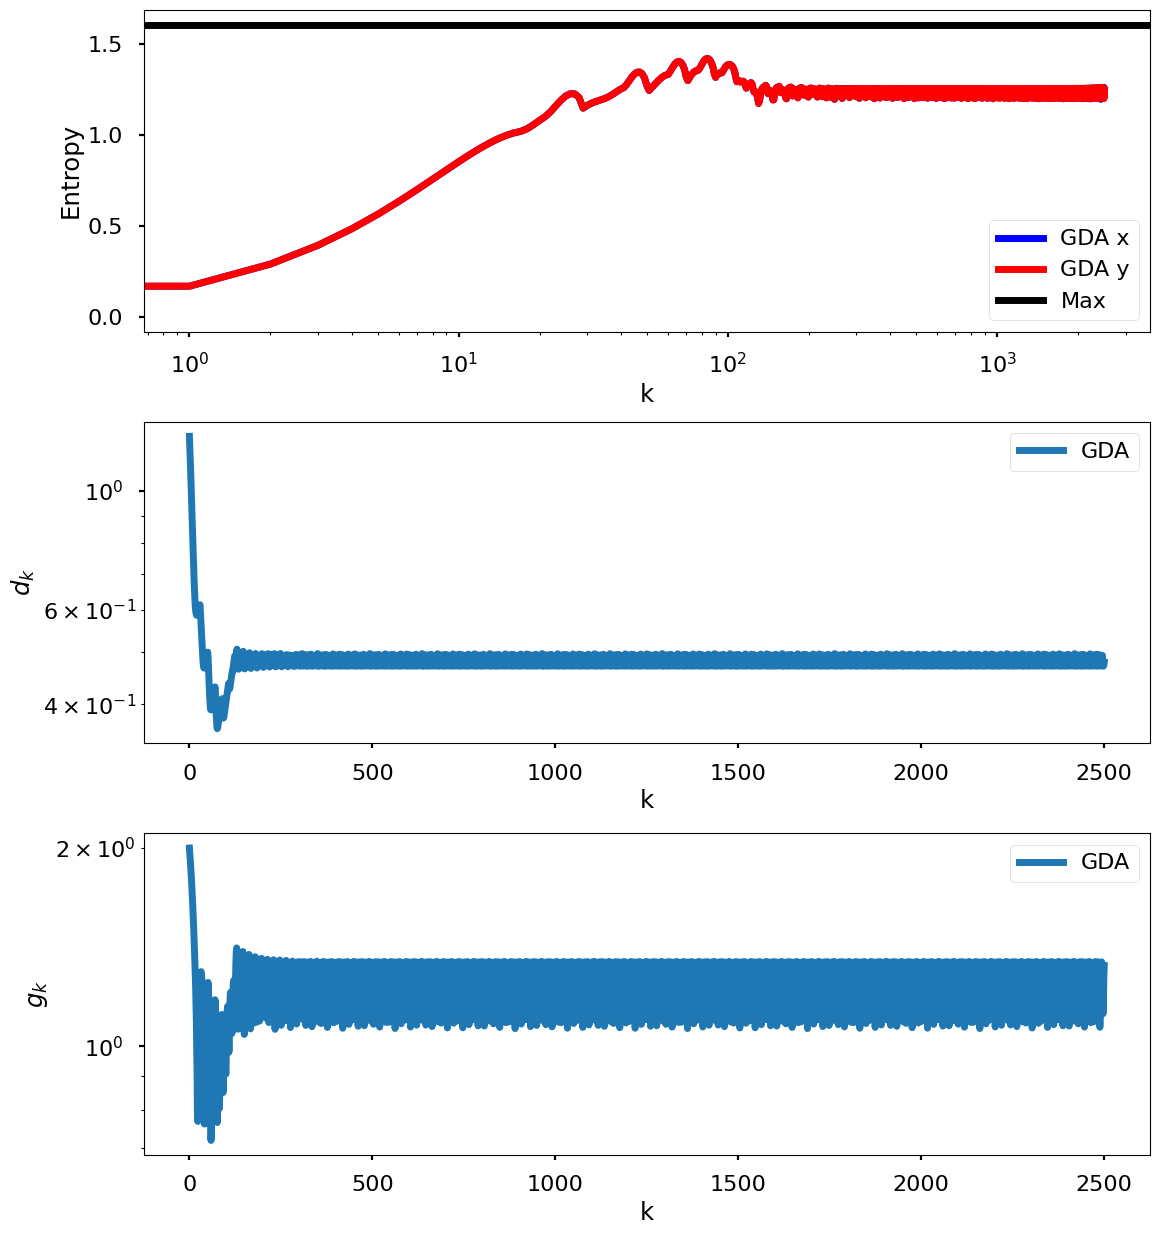

In [9]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', label="GDA y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(3)** (3 point) What kind of behavior do you observe ? Do the iterates converge ? Play with the step_size and the number of iterations.




**Answer:** We could observe that the iterates do not converge, and they oscillate around the optimal strategies. We tried different step sizes and the number of iterations to see the effect on the convergence:

- The lower the step size, the less oscillations will be observed. However, the convergence will be slower requiring more iterations to reach an optimal strategy.
- The higher the step size, the faster the convergence, but we can also observe divergence especially when the number of iterations is high.

Therefore, we need to find a balance between the number of iterations and the step size in order to avoid the divergence.

**(4)** (10 points) As you've shown both theoretically and in practice, simultaneous Gradient Descent Ascent (sGDA) cannot solve the problem. You will now implement `ExtraGradient` (EG), an algorithm that can solve bilinear games. We will denote the projection onto the decision space of the x-player and y-player, $\Pi_{\mathcal X}$ and $\Pi_{\mathcal Y}$, respectively.

As discussed in class, the idea behind extra-gradient is to approximate an implicit update with a more tractable one. 

Let $\mathbf{z}_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix}$, $\Pi(\mathbf{z})=\begin{bmatrix} \Pi_{\mathcal X}(x) \\ \Pi_{\mathcal Y}(y) \end{bmatrix}$ and $G(\mathbf{z}_k) = \begin{bmatrix} \nabla_x f(x_k,y_k) \\ -\nabla_y f(x_k,y_k) \end{bmatrix}$.

Consider the following implicit updates:
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{red}{\mathbf{z}_{k+1}})) \nonumber
\end{equation}

Computing the next iterate $\mathbf{z}_{k+1}$ requires you to solve a fixed point problem because we are evaluating the gradient at the unknown next iterate.  As this is too costly, we circumvent this difficulty by doing an _extrapolation_ step. Define the half steps:

\begin{equation}
    \mathbf{z}_{k+1/2} = \Pi(\mathbf{z}_k - \gamma G(\mathbf{z}_k)) \nonumber
\end{equation}

These half step extrapolation variables will help us to approximate the implicit iterates. We can then write
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k+1/2}})) \nonumber
\end{equation}
The recursion above defines the EG algorithm.


In [10]:
def ExtraGradient(f, x, y, step_size):
    x.grad = None
    y.grad = None
    
    payoff = f(x, y)
    payoff.backward()

    # Compute the value of the half step
    with torch.no_grad():
        x_half = x - step_size * x.grad
        y_half = y + step_size * y.grad

        simplex_project(x_half)
        simplex_project(y_half)

    x_half.requires_grad_()
    y_half.requires_grad_()

    payoff_half = f(x_half, y_half)
    payoff_half.backward()

    # Update the final point with the gradient at the half step
    with torch.no_grad():
        x.sub_(step_size * x_half.grad)
        y.add_(step_size * y_half.grad)
        simplex_project(x)
        simplex_project(y)

In [11]:
eg_x_sequence, eg_y_sequence = run_alg(ExtraGradient, f, x_init, y_init, step_size=0.1, n_iterations=2500)

In [ ]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(eg_x_sequence[:, dim_pairs[dim_pair]], 
                  eg_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

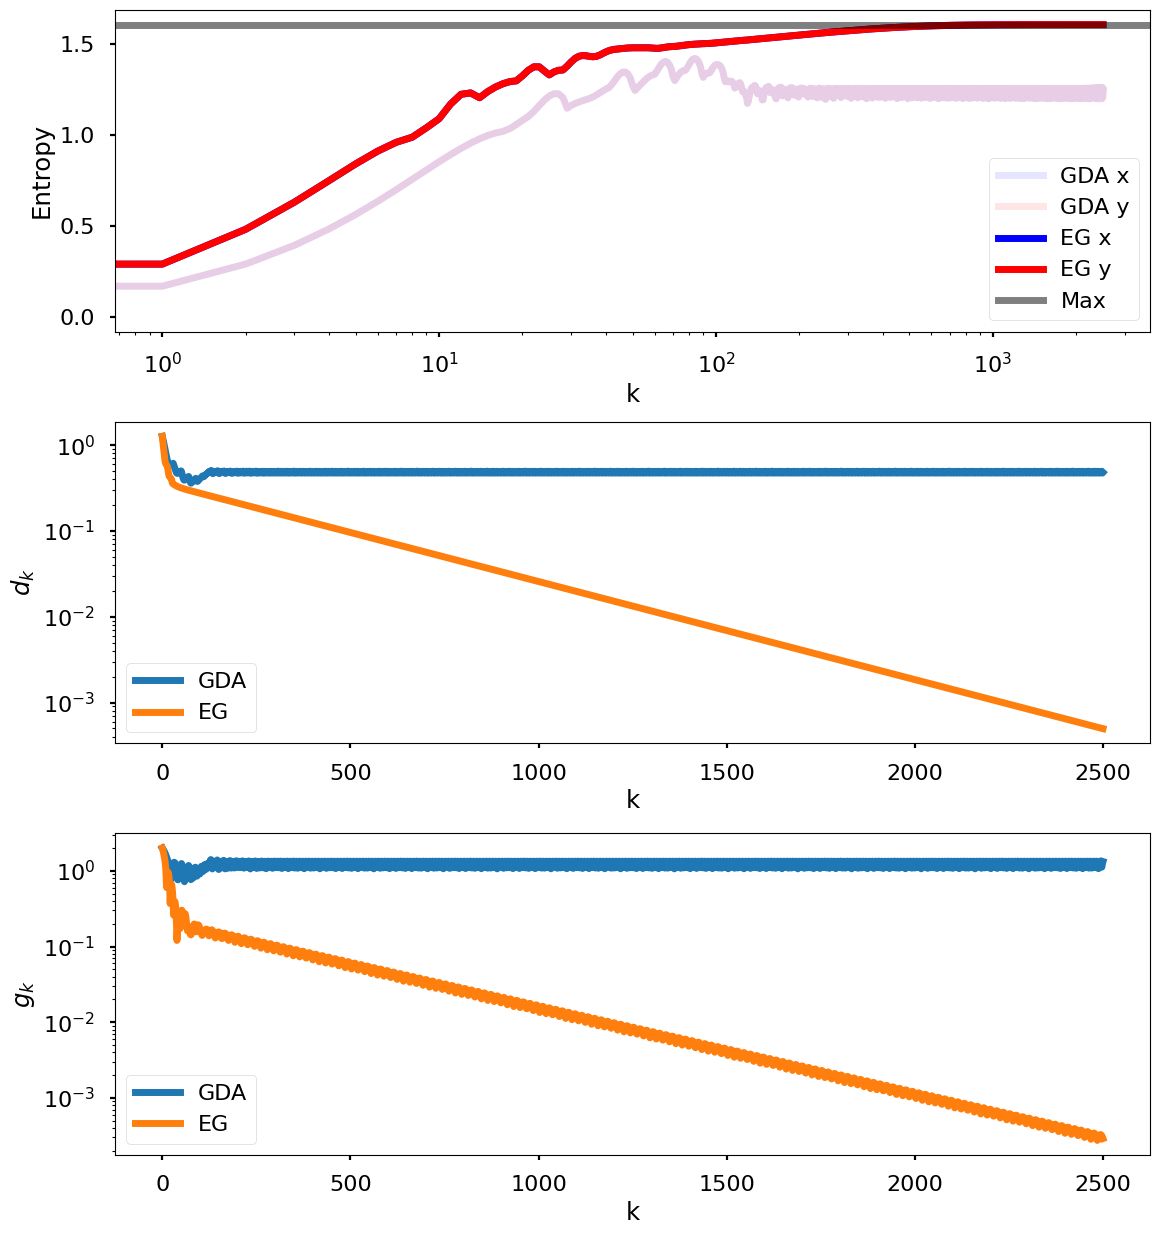

In [13]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', alpha=0.1, label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', alpha=0.1, label="GDA y")
ax[0].plot(range(len(eg_x_sequence)), entropy(eg_x_sequence, axis=1), lw=5, color='b', label="EG x")
ax[0].plot(range(len(eg_y_sequence)), entropy(eg_y_sequence, axis=1), lw=5, color='r', label="EG y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].plot(range(len(eg_x_sequence)), distance_to_opt(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(eg_x_sequence)), duality_gap(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(BONUS)** What can you observe about the optimal solution? What properties does the optimal Rock-Paper-Scissors-Lizard-Spock strategy have? Prove that extra-gradient in the bilinear case doesn't diverge like GDA. (Again, candy reward for correct answers!)




**(5)** (10 points) It turns out that we can _generalize_ the ExtraGradient method naturally by striving for a bit more accurate extrapolation. Namely, instead of always performing 1 extrapolation step updating half-iterates before the main parameter update, we can perform $m\geq 1$ fractional steps. Implement this ClairvoyantExtraGradient (CEG) method [1], with the precise update step formulas given below:

$$
\begin{aligned}
    \mathbf{z}_{k+1(\color{green}{1/m+1})} &= \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k}})) \\
    \mathbf{z}_{k+1(\color{green}{2/m+1})} &= \Pi(\mathbf{z}_{k+1(\color{green}{1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{1/m+1})})) \\
    &\vdots \\
    \mathbf{z}_{k+1(\color{green}{m/m+1})} &= \Pi(\mathbf{z}_{k+1(\color{green}{m-1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{m-1/m+1})})) \\
    \mathbf{z}_{k+1} &= \Pi(\mathbf{z}_k - \gamma G({\mathbf{z}_{k+1(\color{green}{m/m+1})} }))
\end{aligned}
$$

[1] Cevher, Volkan, Georgios Piliouras, Ryann Sim, and Stratis Skoulakis. “Min-Max Optimization Made Simple: Approximating the Proximal Point Method via Contraction Maps.” In 2023 Symposium on Simplicity in Algorithms (SOSA), 192–206. Proceedings. Society for Industrial and Applied Mathematics, 2023. https://doi.org/10.1137/1.9781611977585.ch18.

In [14]:
def ClairvoyantExtraGradient(f, x, y, step_size, m=1):
    # Initialize intermediate points x_i, y_i from x, y
    x_i = x.clone().detach()
    y_i = y.clone().detach()

    # Enable gradients for intermediate points
    x_i.requires_grad_()
    y_i.requires_grad_()

    for i in range(m):
        # Clean gradients of intermediate points
        x_i.grad = None
        y_i.grad = None

        # Compute gradients of intermediate points
        payoff = f(x_i, y_i)
        payoff.backward()

        # Update intermediate points
        with torch.no_grad():
            x_i.sub_(step_size * x_i.grad)
            y_i.add_(step_size * y_i.grad)

            simplex_project(x_i)
            simplex_project(y_i)

    # Clean gradients of final intermediate points
    x_i.grad = None
    y_i.grad = None
    
    # Compute gradients of final intermediate points
    payoff = f(x_i, y_i)
    payoff.backward()

    # Compute final step
    with torch.no_grad():
        x.sub_(step_size * x_i.grad)
        y.add_(step_size * y_i.grad)

        simplex_project(x)
        simplex_project(y)

In [15]:
m_values = [1, 2, 3, 5, 10, 25] # You can change this if you wish
ceg_x_sequences, ceg_y_sequences = [], []
for m in m_values:
    print("m =", m)
    step_size = 0.1 if m != 10 else 0.09 # You can change this if you wish
    ceg_x_sequence, ceg_y_sequence = run_alg(ClairvoyantExtraGradient, f, x_init, y_init, 
                                             n_iterations=2500, step_size=step_size, m=m)
    ceg_x_sequences.append(ceg_x_sequence)
    ceg_y_sequences.append(ceg_y_sequence)

m = 1
m = 2
m = 3
m = 5
m = 10
m = 25


In [16]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(L_x, L_y, dim_pair):
    visualize_seq(L_x[:, dim_pairs[dim_pair]], 
                  L_y[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    print("m =", m)
    interact(visualize_seq_slice, L_x=fixed(ceg_x_sequence), L_y=fixed(ceg_y_sequence), dim_pair=SelectionSlider(
        options=range(len(dim_pairs)),
        value=0,
        description="Dim pair:",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True
    ))

m = 1


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 2


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 3


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 5


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 10


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 25


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

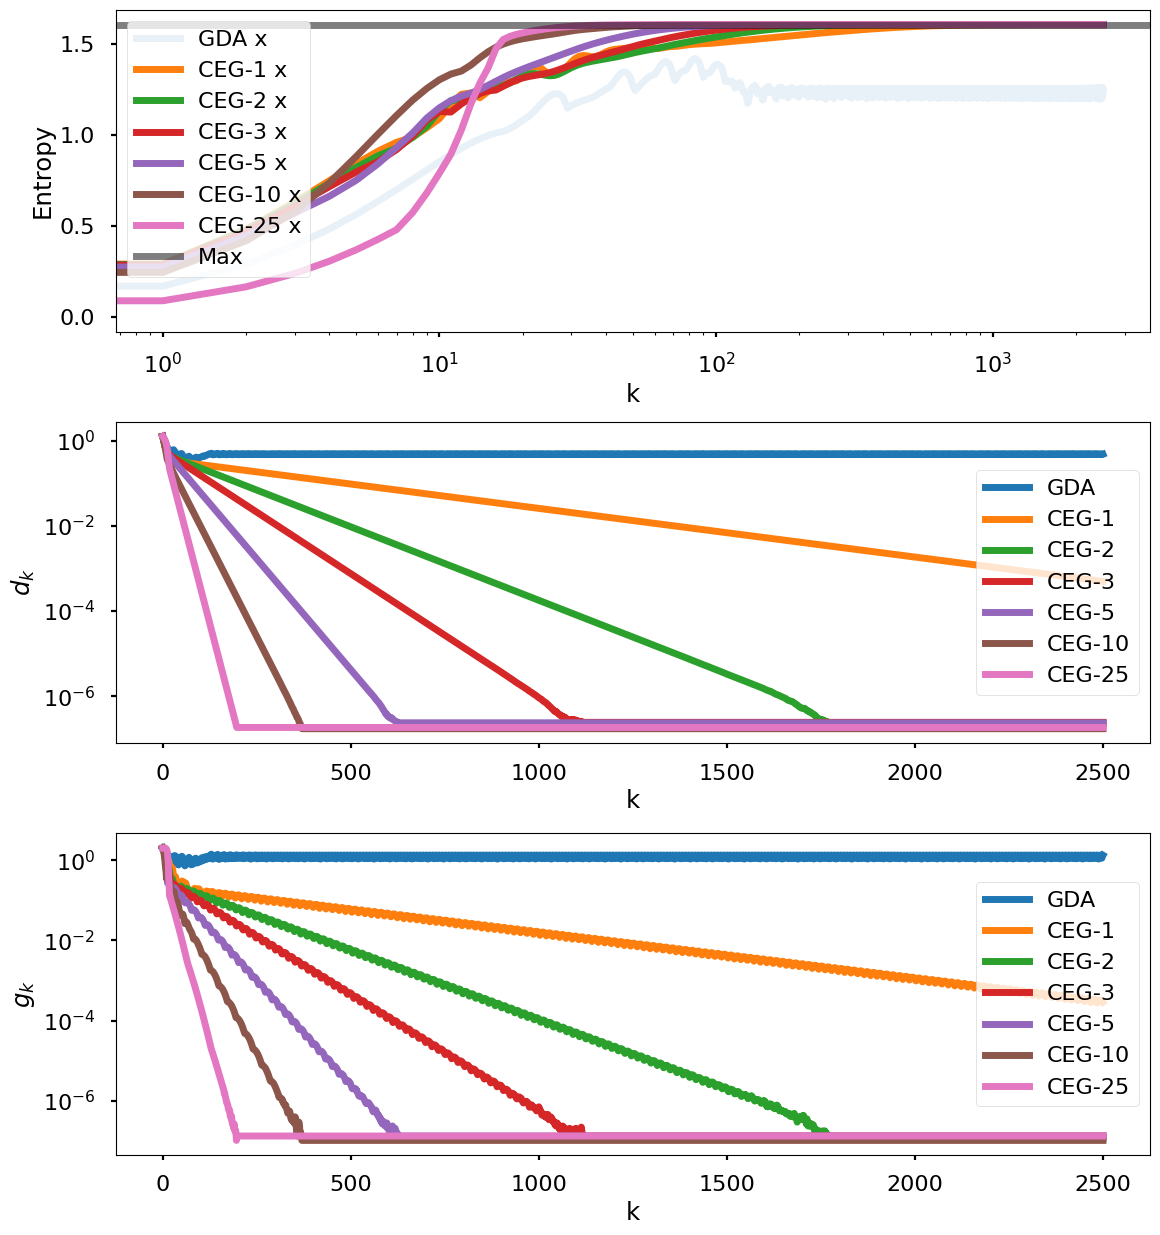

In [17]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, alpha=0.1, label="GDA x")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    ax[0].plot(range(len(ceg_x_sequence)), entropy(ceg_x_sequence, axis=1), lw=5, label=f"CEG-{m} x")
    ax[1].plot(range(len(ceg_x_sequence)), distance_to_opt(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
    ax[2].plot(range(len(ceg_x_sequence)), duality_gap(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()
fig.tight_layout()
plt.show()

**(6)** (5 points) Discuss what you observe for the CEG runs. How do the value of $m$ and the step size influence the convergence and the computation cost? Is there a sweet spot?




When using ClairvoyantExtraGradient (CEG), the value of m and the step size influence the convergence and the computational cost in the following ways:

- **m**: The higher the value of m, the faster is the convergence to the optimal strategy. This is because a larger m allows the algorithm to take into account more intermediate steps, providing a better approximation of the direction to take for the next step. However, computing more intermediate steps requires more computation and therefore increases the computational cost.

    Moreover, as m increases, the duality gap decreases until its value is close to zero. It means that the solution to the dual problem is converging to the optimal solution. However, the entropy of the strategies also increases, suggesting that they become more random.

- **step size:** This value is inversely proportional to the convergence rate. Thus, if the step size is too small, the algorithm will need more iterations to converge. However, if the step size is too large, the algorithm starts to diverge. This is reflected in the entropy behavior which oscillates up and down as the step size increases, indicating that the strategies vary between being more random and less random. Also, the duality gap will be higher when using a larger step size, indicating that the solution to the dual problem is not converging to the optimal solution.

Therefore, CEG algorithm will perform effectively when there is a balance between the number of intermediate steps (m) and the step size. A good choice of m (not too large) and step size (not too large or small) will help to avoid divergence and reach the optimal strategy with less iterations and computational cost.